## Simple Level-1 Workflow with normal functions

In [ ]:
def func3(input3):
    return input3 + ": This is the input from function 3"

In [ ]:
def func1(input1):
    return input1 + ": This is the input from function 1"

In [ ]:
def func2(input2):
    output = func3("This is function 2 in between")
    return input2 + " " + output + ": This is the input from function 2"

In [ ]:
from langgraph.graph import Graph

In [ ]:
workflow1 = Graph()

In [ ]:
workflow1.add_node("function1", func1)

In [ ]:
workflow1.add_node("function2", func2)

In [ ]:
workflow1.add_edge("function1","function2")

In [ ]:
workflow1.set_entry_point("function1")

In [ ]:
workflow1.set_finish_point("function2")

In [ ]:
app1 = workflow1.compile()

In [ ]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [ ]:
app1.invoke("Hello I am Atharva")

In [ ]:
input = "Hello I am Atharva"

In [ ]:
for output in app1.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

## Let's create a new workflow with LLMs

In [1]:
import os

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")
GROQ_API_KEY = os.getenv("GROQ_API_KEY")
LANGCHAIN_API_KEY = os.getenv("LANGCHAIN_API_KEY")
LANGSMITH_PROJECT = os.getenv("LANGSMITH_PROJECT")
HUGGINGFACE_API_KEY = os.getenv("HUGGINGFACE_API_KEY")
SERPER_API_KEY = os.getenv("SERPER_API_KEY")

os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["GROQ_API_KEY"] = GROQ_API_KEY
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
os.environ["LANGSMITH_PROJECT"] = LANGSMITH_PROJECT
os.environ["HUGGINGFACE_API_KEY"] = HUGGINGFACE_API_KEY
os.environ["SERPER_API_KEY"] = SERPER_API_KEY

In [4]:
from langchain_groq import ChatGroq

open_llm = ChatGroq(model_name = "llama-3.3-70b-versatile")

In [5]:
open_llm.invoke("Hello")

AIMessage(content='Hello. How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.01730791, 'prompt_time': 0.010591019, 'queue_time': 0.212295878, 'total_time': 0.027898929}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_6507bcfb6f', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--fa319834-6cea-48b2-ba0d-92e1baaecc58-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})

In [6]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model = "models/embedding-gecko-001")

/Users/atharvabot7/Downloads/MLOPS-Tutorials/LangGraph/agent_exec/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
def function1(input):
    open_llm = ChatGroq(model_name = "llama-3.3-70b-versatile")
    response = open_llm.invoke(input).content
    return response

In [8]:
def function2(input):
    upper_case = input.upper()
    return upper_case

In [9]:
from langgraph.graph import Graph

In [10]:
workflow2 = Graph()

In [11]:
workflow2.add_node("llm", function1)

In [12]:
workflow2.add_node("convert_upper", function2)

In [13]:
workflow2.add_edge("llm","convert_upper")

In [14]:
workflow2.set_entry_point("llm")
workflow2.set_finish_point("convert_upper")

In [15]:
app2 = workflow2.compile()

In [16]:
app2.invoke("Who is current Prime Minister of India?")

'THE CURRENT PRIME MINISTER OF INDIA IS NARENDRA MODI. HE HAS BEEN IN OFFICE SINCE MAY 26, 2014, AND IS SERVING HIS SECOND TERM AS PRIME MINISTER.'

In [18]:
print(app2.invoke("Is learning machine learning important?"))

**YES, LEARNING MACHINE LEARNING IS IMPORTANT**. MACHINE LEARNING (ML) HAS BECOME A CRUCIAL ASPECT OF VARIOUS INDUSTRIES, INCLUDING TECHNOLOGY, HEALTHCARE, FINANCE, AND MORE. HERE ARE SOME REASONS WHY LEARNING ML IS ESSENTIAL:

1. **INCREASING DEMAND**: THE DEMAND FOR ML EXPERTS IS RISING RAPIDLY, AND HAVING ML SKILLS CAN OPEN UP NEW CAREER OPPORTUNITIES.
2. **IMPROVED DECISION-MAKING**: ML HELPS ORGANIZATIONS MAKE INFORMED DECISIONS BY ANALYZING LARGE DATASETS AND PROVIDING INSIGHTS THAT MIGHT BE DIFFICULT TO OBTAIN THROUGH TRADITIONAL METHODS.
3. **AUTOMATION AND EFFICIENCY**: ML CAN AUTOMATE REPETITIVE TASKS, FREEING UP RESOURCES FOR MORE STRATEGIC AND CREATIVE WORK.
4. **COMPETITIVE ADVANTAGE**: COMPANIES THAT ADOPT ML CAN GAIN A COMPETITIVE EDGE OVER THOSE THAT DON'T, AS ML CAN HELP THEM INNOVATE AND IMPROVE THEIR PRODUCTS AND SERVICES.
5. **PROBLEM-SOLVING**: ML CAN BE USED TO SOLVE COMPLEX PROBLEMS, SUCH AS IMAGE AND SPEECH RECOGNITION, NATURAL LANGUAGE PROCESSING, AND PREDICTIV

In [19]:
input = "Do you think I am dumb?"

In [20]:
for output in app2.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
No, I don't think you're dumb. I'm a large language model, my purpose is to assist and provide information, not to judge or make personal opinions about individuals. Intelligence comes in many forms, and it's not defined by a single interaction or conversation. Everyone has their own strengths, weaknesses, and learning styles. 

I'm here to help answer your questions, provide information, and support your learning. If you have any questions or topics you'd like to discuss, I'm here to listen and help.


here is output from convert_upper
_______
NO, I DON'T THINK YOU'RE DUMB. I'M A LARGE LANGUAGE MODEL, MY PURPOSE IS TO ASSIST AND PROVIDE INFORMATION, NOT TO JUDGE OR MAKE PERSONAL OPINIONS ABOUT INDIVIDUALS. INTELLIGENCE COMES IN MANY FORMS, AND IT'S NOT DEFINED BY A SINGLE INTERACTION OR CONVERSATION. EVERYONE HAS THEIR OWN STRENGTHS, WEAKNESSES, AND LEARNING STYLES. 

I'M HERE TO HELP ANSWER YOUR QUESTIONS, PROVIDE INFORMATION, AND SUPPORT YOUR LEARNING

## Creating a simple output token counter

In [21]:
def function3(input):
    token=input.split()
    token_number=len(token)
    token_number=f"total token number is {token_number}"
    return token_number

In [22]:
workflow3=Graph()
workflow3.add_node("llm",function1)
workflow3.add_node("token_counter",function3)
workflow3.add_edge("llm","token_counter")
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")
app3=workflow3.compile()

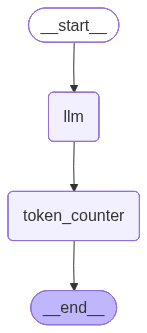

In [23]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [24]:
app3.invoke("what is a name of first indian prime minister?")

'total token number is 27'

In [25]:
input = "what is a name of first indian prime minister?"

In [26]:
for output in app3.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
The first Indian Prime Minister was Jawaharlal Nehru. He served as the Prime Minister of India from August 15, 1947, to May 27, 1964.


here is output from token_counter
_______
total token number is 24




In [27]:
input = "what is Japan's GDP?"

In [28]:
for output in app3.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
The GDP (Gross Domestic Product) of Japan can vary depending on the source and the time frame. As of my knowledge cutoff in 2023, Japan's GDP was approximately:

* Nominal GDP: around $5.15 trillion USD (2022 estimate)
* PPP (Purchasing Power Parity) GDP: around $5.58 trillion USD (2022 estimate)

Please note that these numbers are subject to change and may have been updated since my knowledge cutoff. For the most up-to-date information, I recommend checking with reliable sources such as the International Monetary Fund (IMF), the World Bank, or the Japanese government's statistics agency.

Here is a rough breakdown of Japan's GDP over the past few years:

* 2020: around $4.78 trillion USD (nominal)
* 2021: around $5.07 trillion USD (nominal)
* 2022: around $5.15 trillion USD (nominal)

Keep in mind that GDP is just one measure of a country's economic performance, and there are many other factors to consider when evaluating a country's economy.


here is 